<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#The-Data-Set" data-toc-modified-id="The-Data-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Data Set</a></span><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Source</a></span></li><li><span><a href="#Features-and-Descriptions" data-toc-modified-id="Features-and-Descriptions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Features and Descriptions</a></span></li><li><span><a href="#Cursory-View-of-Data" data-toc-modified-id="Cursory-View-of-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cursory View of Data</a></span></li></ul></li><li><span><a href="#Investigate-Outliers" data-toc-modified-id="Investigate-Outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Investigate Outliers</a></span><ul class="toc-item"><li><span><a href="#Whisker-Plot" data-toc-modified-id="Whisker-Plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Whisker Plot</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Unique-Values-for-Features" data-toc-modified-id="Unique-Values-for-Features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Unique Values for Features</a></span></li><li><span><a href="#Check-out-Target" data-toc-modified-id="Check-out-Target-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Check out Target</a></span></li></ul></li><li><span><a href="#Visualizations-of-Target-v-Feature" data-toc-modified-id="Visualizations-of-Target-v-Feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizations of Target v Feature</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Note,-some-of-the-features-could-be-grouped-in-bins-or-rounded-up/down-to-make-the-plots-better." data-toc-modified-id="Note,-some-of-the-features-could-be-grouped-in-bins-or-rounded-up/down-to-make-the-plots-better.-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Note, some of the features could be grouped in bins or rounded up/down to make the plots better.</a></span></li></ul></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation</a></span><ul class="toc-item"><li><span><a href="#Result:" data-toc-modified-id="Result:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Result:</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Standard-scale-the-data" data-toc-modified-id="Standard-scale-the-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Standard scale the data</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li></ul></div>

# Import Libraries

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

In [10]:
# pip install pandas-profiling

# The Data Set

In [11]:
df = pd.read_csv("KidneyDisease.csv")

## Source
https://www.kaggle.com/abhia1999/chronic-kidney-disease

## Features and Descriptions
Bp - Blood Pressure - systolic - the top measure?

Sg - Specific Gravity - the ratio of urine density compared with water density and provides information on the kidney's ability to concentrate urine

Al - Albumin - Albumin is a protein found in your blood. A healthy kidney doesn't let albumin pass into the urine. A damaged kidney lets some albumin pass into the urine

Su - Sugar - When blood sugar levels get too high, the condition is called hyperglycemia. Hyperglycemia is a problem for people with diabetes, and it poses a significant health risk when you have chronic kidney disease

Rbc - Red Blood Cell - Hematuria means that red blood cells are in the urine. Urine does not normally contain red blood cells. The filters in the kidney prevent blood from entering the urine

Bu - Blood Urea - Urea nitrogen is a normal waste product in your blood that comes from the breakdown of protein from the foods you eat and from your body metabolism. It is normally removed from your blood by your kidneys, but when kidney function slows down, the BUN level rises

Sc - Serum Creatine - Creatinine is a waste product in your blood that comes from muscle activity. It is normally removed from your blood by your kidneys, but when kidney function slows down, the creatinine level rises

Sod - Sodium - Although sodium is essential for the body functions listed above, too much sodium can be harmful for people with kidney disease because your kidneys cannot eliminate excess sodium and fluid from your body. As sodium and fluid build up in your tissues and bloodstream, your blood pressure increases and you feel uncomfortable.

Pot - Potassium - When kidneys fail they can no longer remove excess potassium, so the level builds up in the body. High potassium in the blood is called hyperkalemia, which may occur in people with advanced stages of chronic kidney disease

Hemo - Hemoglobin - Hemoglobin is the part of red blood cells that carries oxygen from your lungs to all parts of your body. Your hemoglobin level tells your doctor if you have anemia, which makes you feel tired and have little energy. If you have anemia, you may need treatment with iron supplements and a hormone called erythropoietin (EPO). The goal of anemia treatment is to reach and maintain a hemoglobin level of at least 11 to 12.

Wbcc - White Blood Cell Count - Elevated white blood cell count is a well-known predictor of chronic kidney disease progression

Rbcc - Red Blood Cell Count - EPO tells your body to make red blood cells. When you have kidney disease, your kidneys cannot make enough EPO. Low EPO levels cause your red blood cell count to drop and anemia to develop.

Htn - Hypertension - The nephrons in the kidneys are supplied with a dense network of blood vessels, and high volumes of blood flow through them. Over time, uncontrolled high blood pressure can cause arteries around the kidneys to narrow, weaken or harden. These damaged arteries are not able to deliver enough blood to the kidney tissue.

Class - Predicted Class

## Cursory View of Data

In [12]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [13]:
# No null values, 400 entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
Bp       400 non-null float64
Sg       400 non-null float64
Al       400 non-null float64
Su       400 non-null float64
Rbc      400 non-null float64
Bu       400 non-null float64
Sc       400 non-null float64
Sod      400 non-null float64
Pot      400 non-null float64
Hemo     400 non-null float64
Wbcc     400 non-null float64
Rbcc     400 non-null float64
Htn      400 non-null float64
Class    400 non-null int64
dtypes: float64(13), int64(1)
memory usage: 43.8 KB


In [14]:
# Double check null values

df.isna().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [15]:
# https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3
# 
# Did pip install in terminal and restarted notebook.  Tried both codes and neither one created the profile_report
# df.profile_report()

# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [16]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


# Investigate Outliers

In [17]:
# Create a list of the features and drop the target, Class
features = list(df.columns)
features.pop(-1)
print(features)

['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc', 'Htn']


## Whisker Plot

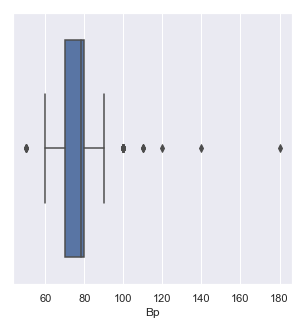

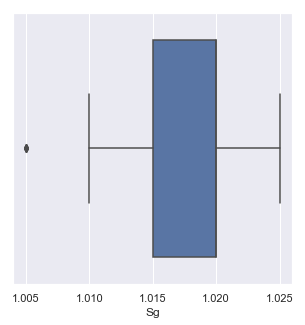

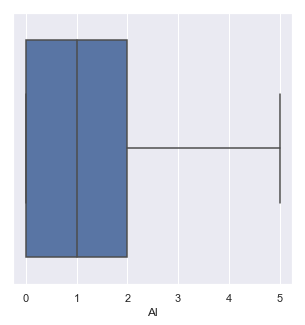

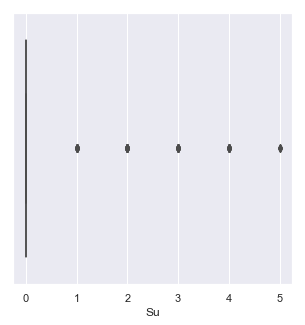

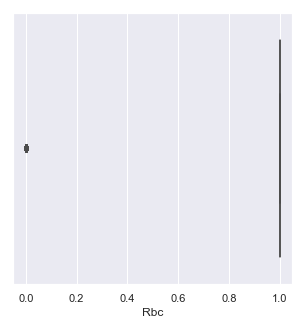

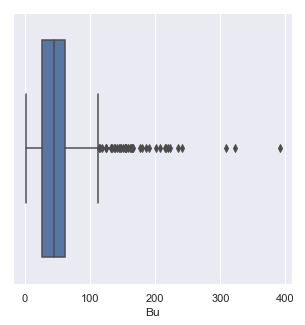

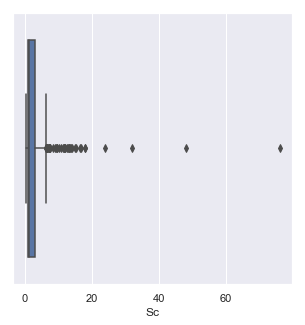

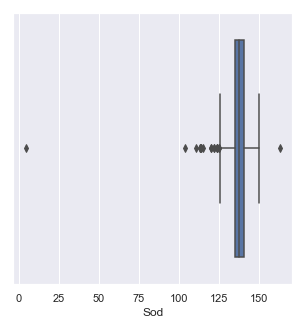

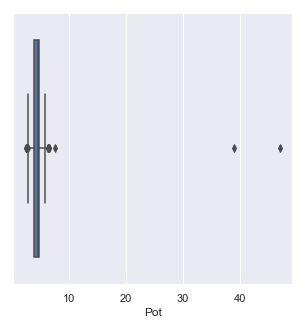

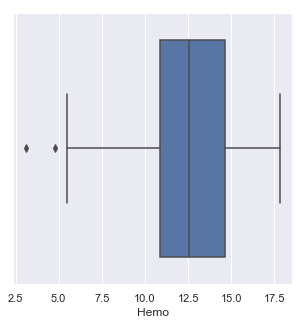

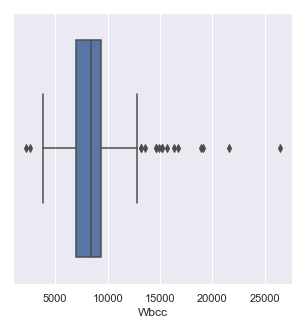

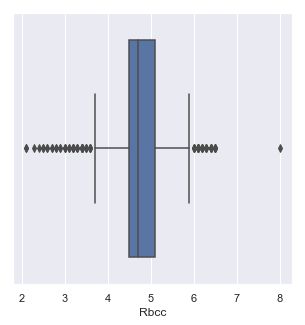

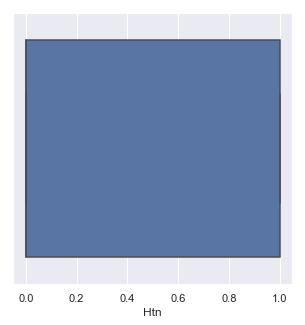

In [18]:
# Create a loop to display graphs of all features

# Interesting!  Without the plt.show() only the last plot came up.

for i in (features):
    sns.set(rc={'figure.figsize':(5,5)})
    sns.boxplot(df[i])
    plt.show()

## Histograms
By looking at the histograms, it is possible there are outlier values for some of the features.  I will assume that they are all valid values.

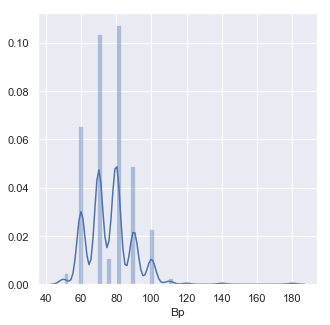

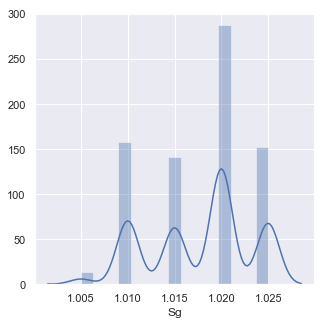

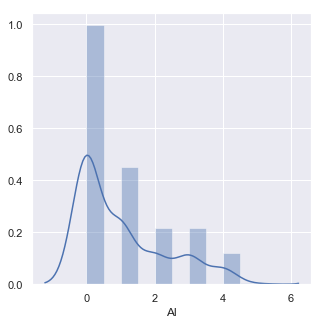

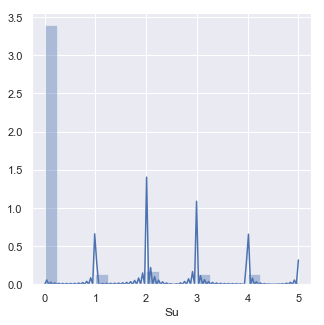

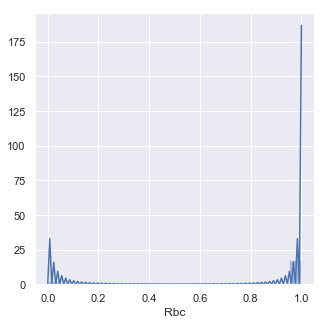

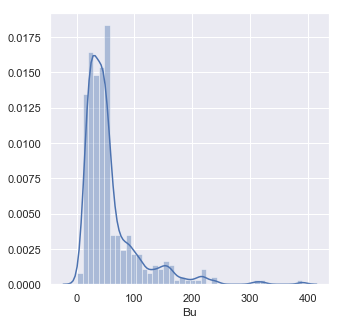

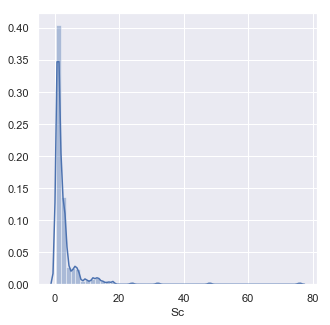

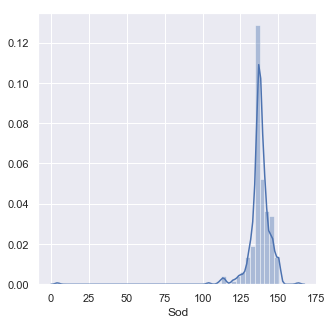

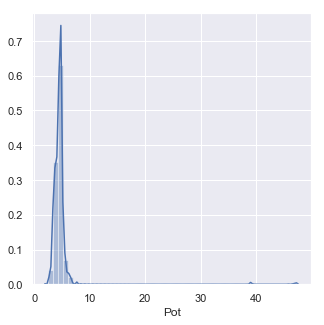

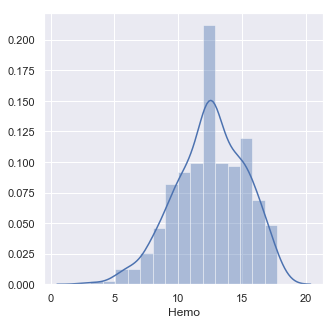

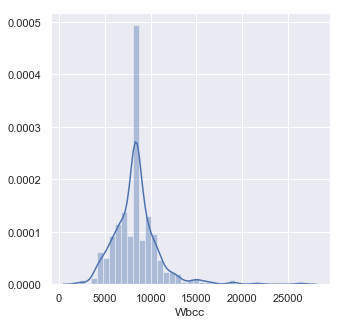

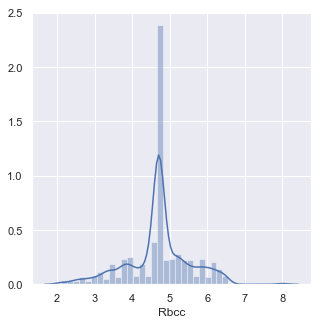

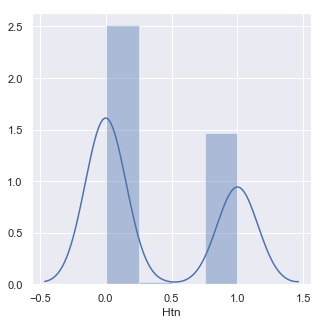

In [19]:
# Do again and with distplot this time

for i in (features):
    sns.set(rc={'figure.figsize':(5,5)})
    sns.distplot(df[i])
    plt.show()


## Unique Values for Features

In [20]:
df.Bp.value_counts().sort_index()

50.0       5
60.0      71
70.0     112
76.0      12
80.0     116
90.0      53
100.0     25
110.0      3
120.0      1
140.0      1
180.0      1
Name: Bp, dtype: int64

In [21]:
def vc_features(df, features):
    for i in features:
        print("Feature: {}".format(i))
        print("The number of unique values are: {}".format(df[i].nunique()))
        print(df[i].value_counts().sort_index())
        print('\n')

In [22]:
 vc_features(df,features)

Feature: Bp
The number of unique values are: 11
50.0       5
60.0      71
70.0     112
76.0      12
80.0     116
90.0      53
100.0     25
110.0      3
120.0      1
140.0      1
180.0      1
Name: Bp, dtype: int64


Feature: Sg
The number of unique values are: 5
1.005      7
1.010     84
1.015     75
1.020    153
1.025     81
Name: Sg, dtype: int64


Feature: Al
The number of unique values are: 6
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: Al, dtype: int64


Feature: Su
The number of unique values are: 6
0.0    339
1.0     13
2.0     18
3.0     14
4.0     13
5.0      3
Name: Su, dtype: int64


Feature: Rbc
The number of unique values are: 2
0.0     47
1.0    353
Name: Rbc, dtype: int64


Feature: Bu
The number of unique values are: 118
1.5       1
10.0      2
15.0      9
16.0      7
17.0      7
18.0      9
19.0     11
20.0      7
21.0      1
22.0      6
23.0      6
24.0      6
25.0     13
26.0      8
27.0      8
28.0      7
29.0      6
30.0      7
31.0      

## Check out Target 
Assume 0 is no KD and 1 is KD

In [23]:
df.Class.value_counts()

1    250
0    150
Name: Class, dtype: int64

# Visualizations of Target v Feature

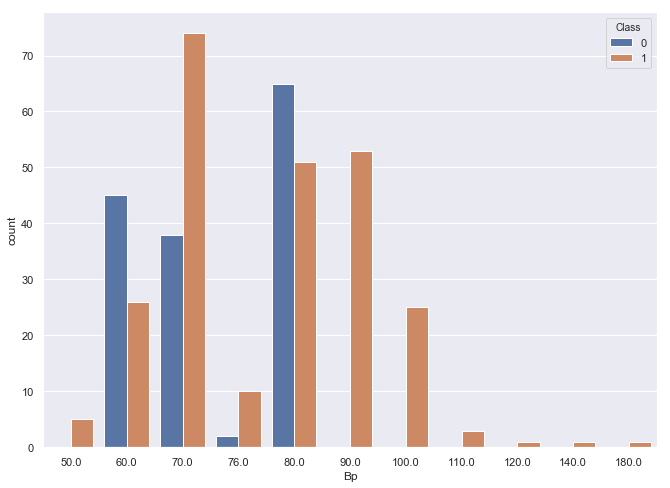

In [24]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='Bp', hue='Class', data = df)

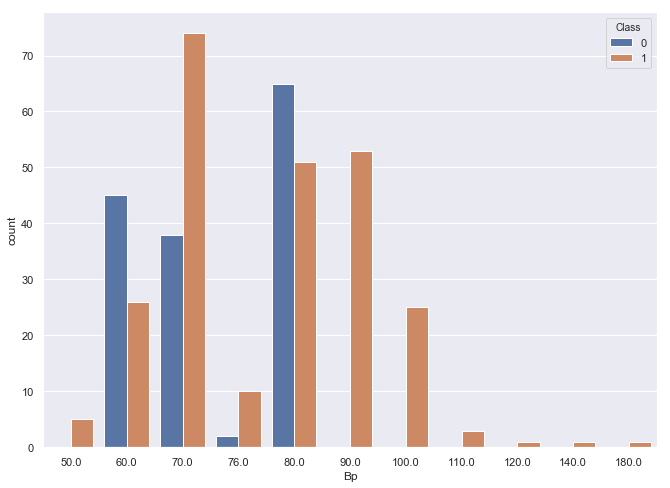

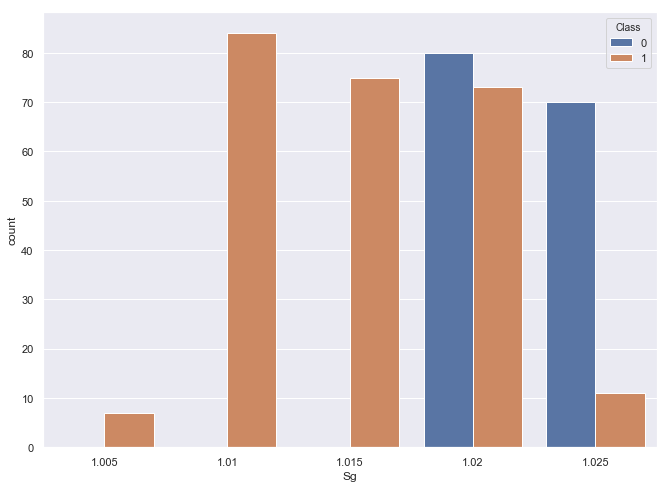

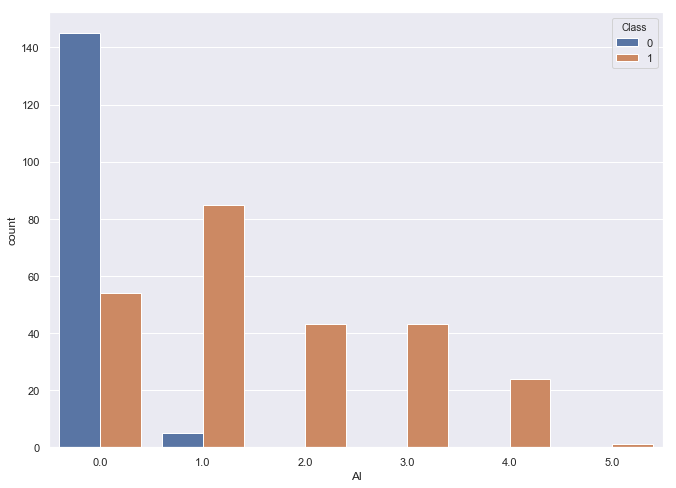

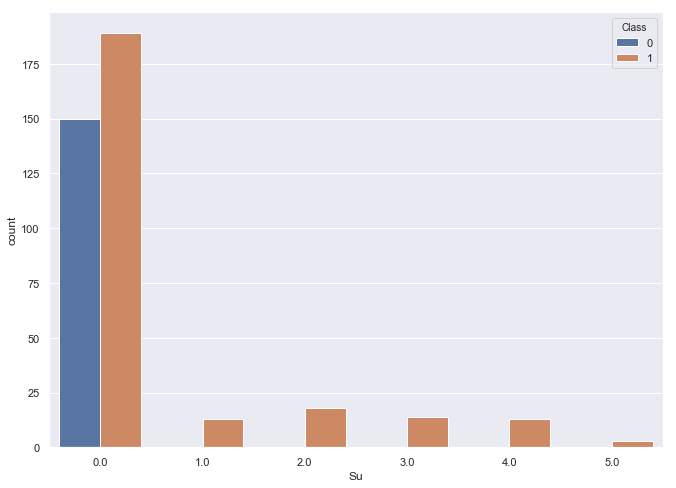

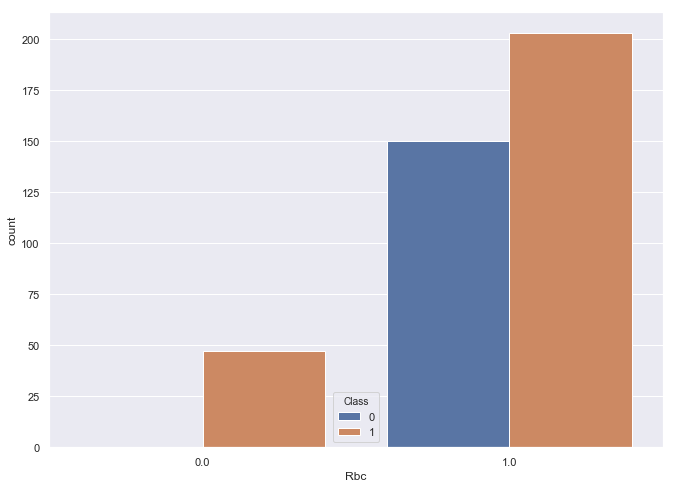

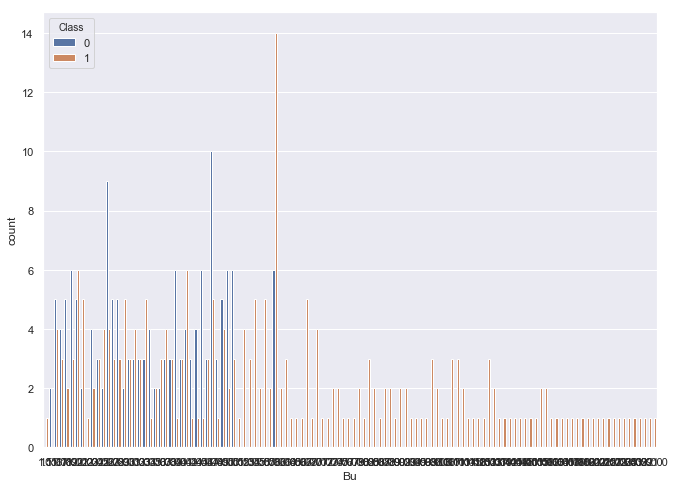

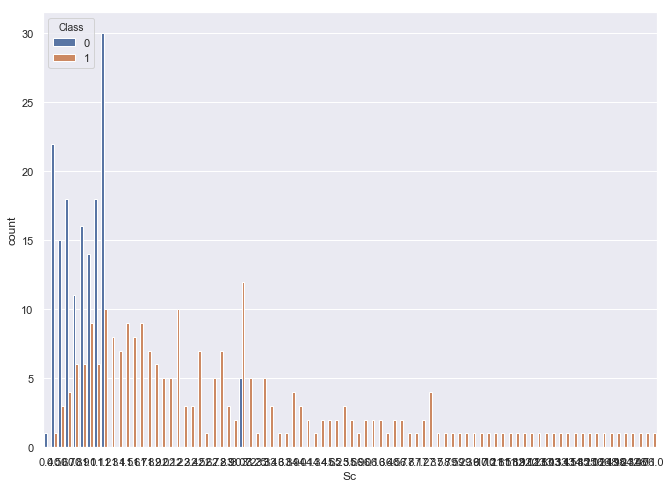

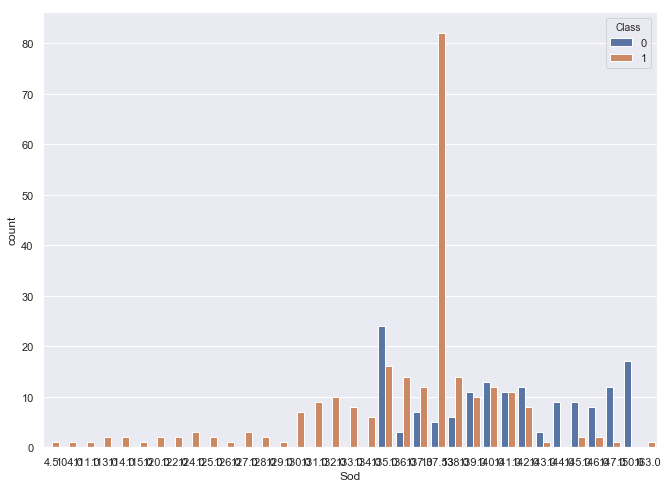

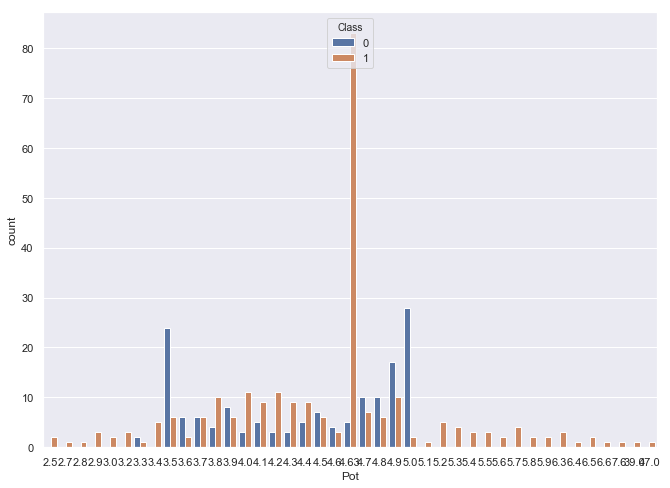

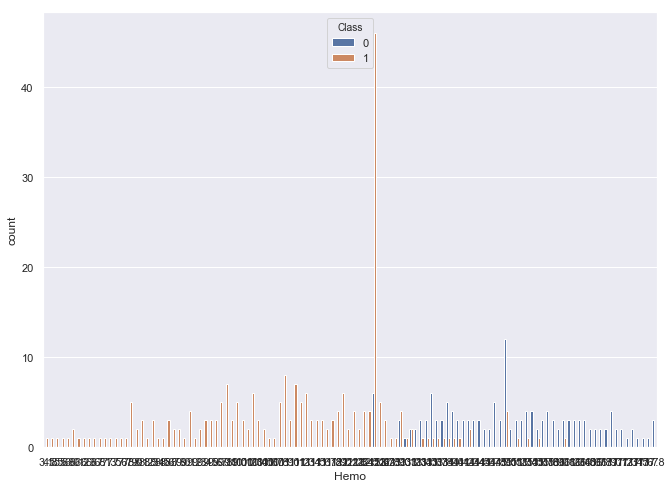

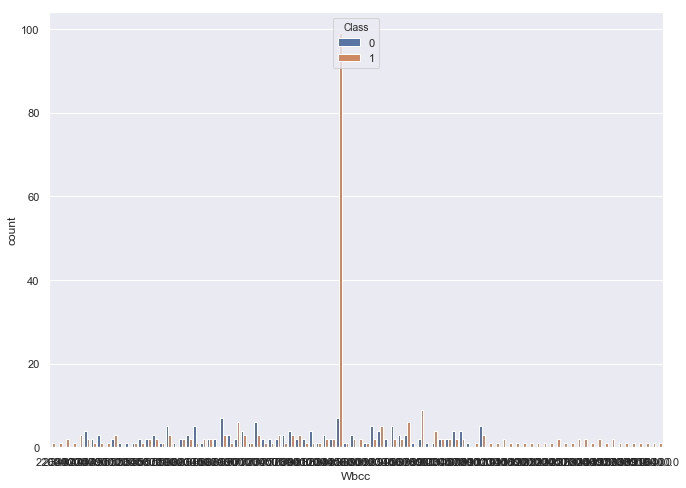

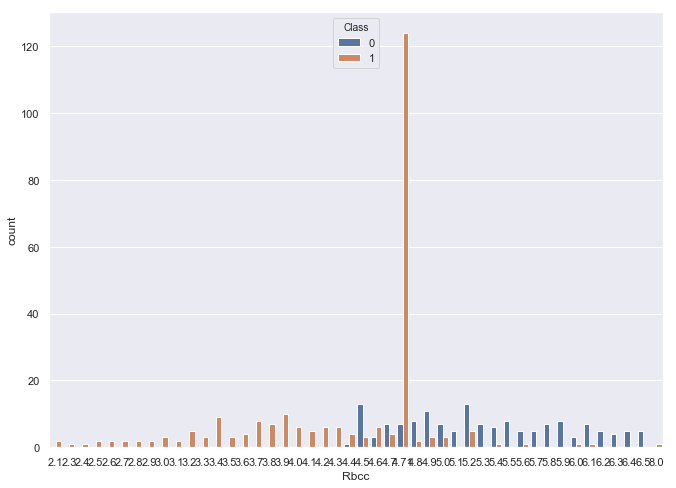

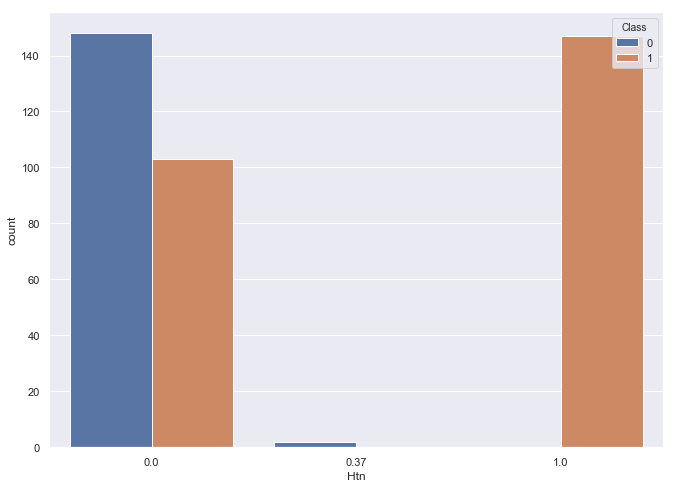

In [25]:

for i in (features):
    rcParams['figure.figsize'] = 11, 8
    sns.countplot(x=df[i], hue='Class', data = df)
    plt.show()

### Note, some of the features could be grouped in bins or rounded up/down to make the plots better.

# Correlation 

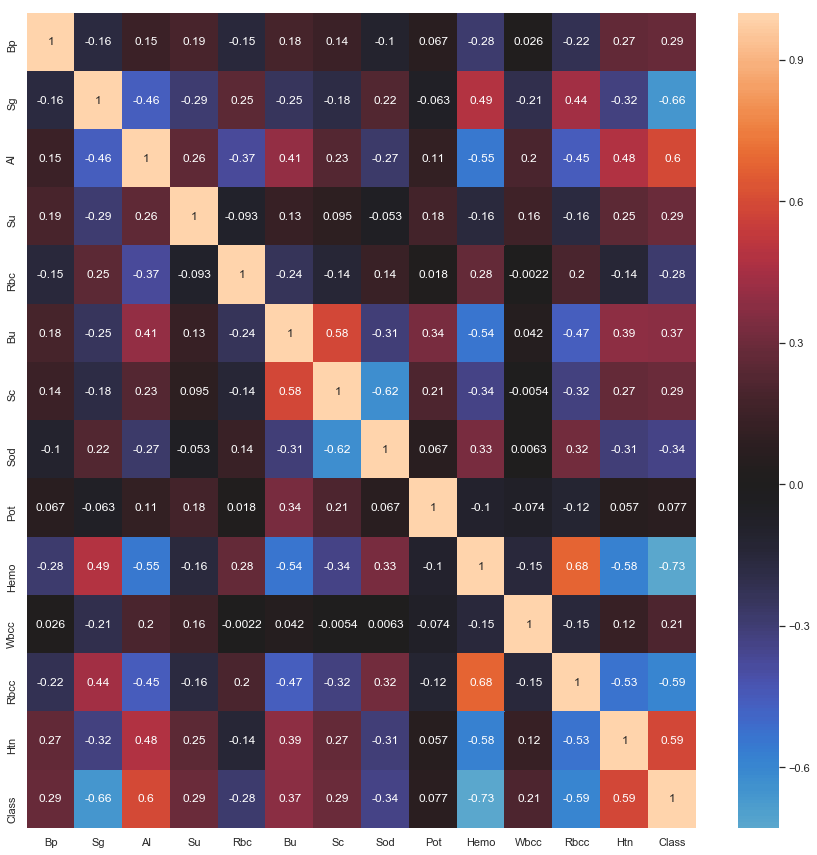

In [26]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=df.corr(), annot=True, center=0, ax=ax)

## Result: 
The highest correlation with Class is Albumin and Hypertension.

It would have been very interesting if data from a medical exam where included for each patient: height, weight, age, gender, smoker/non-smoker, drinker/non-drinker, activity level (if applicable).

# Logistic Regression

## Standard scale the data

In [27]:
y = df['Class']
X = df.drop('Class', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [29]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
scaled_df = pd.DataFrame(X_train, columns=X.columns)

In [31]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
#model_log

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [32]:
i = precision_score(y_train, y_pred_train)
lr_prec = precision_score(y_test, y_pred_test)
k = recall_score(y_train, y_pred_train)
lr_recall = recall_score(y_test, y_pred_test)
m = accuracy_score(y_train, y_pred_train)
lr_acc = accuracy_score(y_test, y_pred_test)
o = f1_score(y_train, y_pred_train)
p = f1_score(y_test, y_pred_test)

In [33]:
print('Training Precision: ', round(i,4)* 100, '%')
print('Testing Precision: ', round(lr_prec,4)* 100, '%')
print('\n')

print('Training Recall: ', round(k,4)* 100, '%')
print('Testing Recall: ', round(lr_recall,4)* 100, '%')
print('\n')

print('Training Accuracy: ', round(m,4)* 100, '%')
print('Testing Accuracy: ', round(lr_acc,4)* 100, '%')
print('\n')

print('Training F1-Score: ', round(o,4)* 100, '%')
print('Testing F1-Score: ', round(p,4)* 100, '%')

Training Precision:  100.0 %
Testing Precision:  100.0 %


Training Recall:  83.50999999999999 %
Testing Recall:  91.94 %


Training Accuracy:  89.67 %
Testing Accuracy:  95.0 %


Training F1-Score:  91.01 %
Testing F1-Score:  95.8 %


In [34]:
def plot_confusion(y_test,y_pred_test):
    from sklearn.metrics import confusion_matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(c_matrix,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()     
    

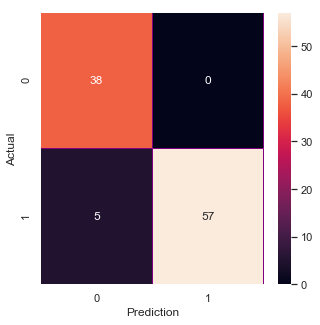

In [35]:
plot_confusion(y_test,y_pred_test)

## Result
The testing data (validation) has high accuracy, precision and recall.  Therefore, the model does a good job of identifing the presence of Kidney Disease.  This is medical data, so it is hoped/expected that would be the case.  Sensitivity (a measures how often a test correctly generates a positive result for people who have the condition that's being tested) over specificity (a measure of healthy patients known not to have the disease, who will test negative for it).


## Feature Importance

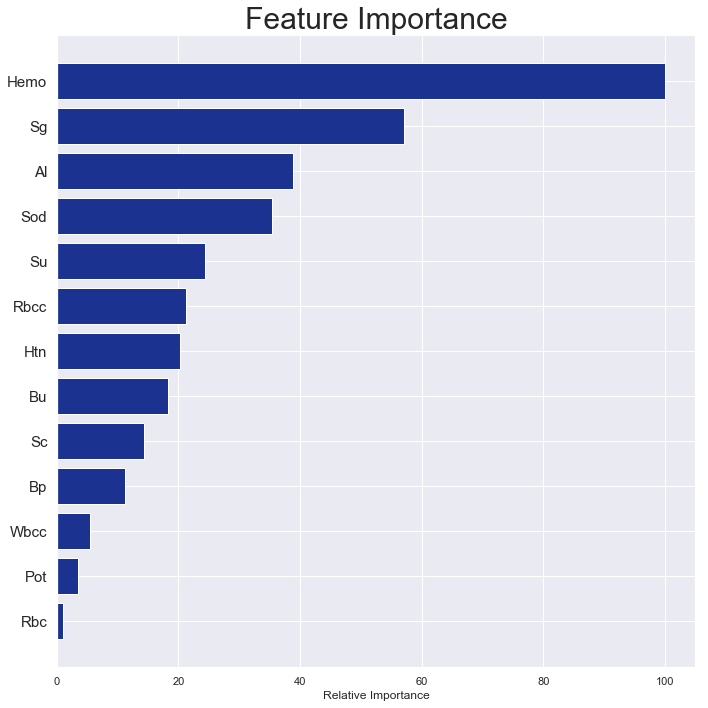

In [36]:
feature_importance = abs(model_log.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color='#1c3290')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=15)
featax.set_xlabel('Relative Importance')
featax.set_title("Feature Importance", fontsize=30)

plt.tight_layout()   
plt.show()

In [ ]:
# Top 5: Hemoglobin, Specific Gravity, Albumin, Sodium, Sugar